# **PROJETO INDUSTRIALL**

## Bibliotecas e Dados

In [45]:
import pandas as pd
import numpy as np
import dabl
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import phik
AV = AutoViz_Class()

import warnings
warnings.filterwarnings("ignore")

In [46]:
df_cand = pd.read_csv("data/database_candidatos.csv",encoding="utf-8",)
df_nota = pd.read_csv("data/notas_candidatos.csv",encoding="utf-8")

In [47]:
new_header = df_cand.iloc[0]
df_cand = df_cand[1:]
df_cand.columns = new_header

## Processamento básico

In [4]:
df_merge = pd.merge(df_cand,df_nota,how='left',on='nome').drop('id_candidato_y',axis=1)

In [5]:
df_merge.rename(columns={"id_candidato_x": "id_candidato"}, inplace=True)
df_merge['idade'] = df_merge['idade'].astype('int32')

In [6]:
df_merge_1 = df_merge[df_merge['aprovado'] != '?']

In [7]:
df_merge_2 = df_merge[df_merge['aprovado'] =='?']

In [8]:
df_merge_1['aprovado'] = df_merge_1['aprovado'].astype('object')
df_merge_1[df_merge_1.filter(regex='nota').columns] = df_merge_1.filter(regex='nota').astype('float64')

Shape of your Data Set: (46, 64)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  46
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  8
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    63 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
    List of variables removed: ['id_candidato', 'nome']

################### Binary-Class VISUALIZATION Started #####################
Data Set Shape: 46 rows, 62 cols
Too many columns to print
   Columns to delete:
'   []'
   Boolean variables %s 


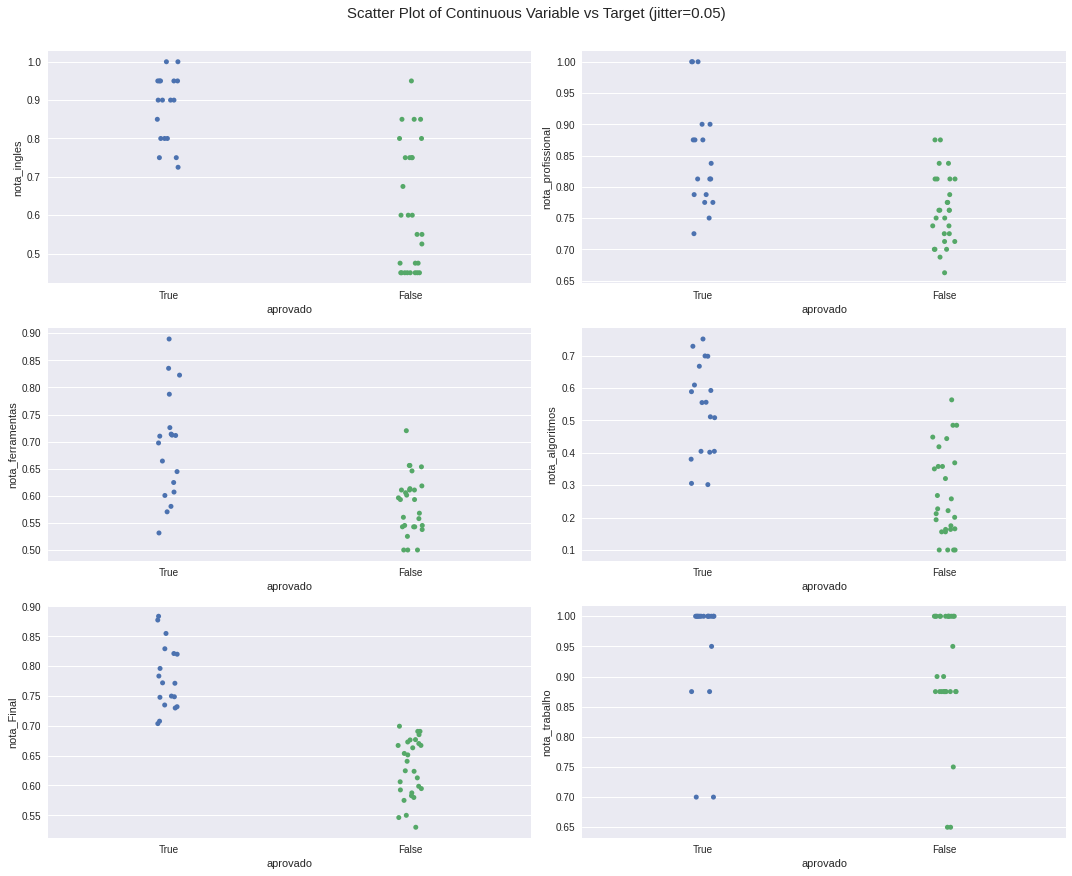

Total Number of Scatter Plots = 21


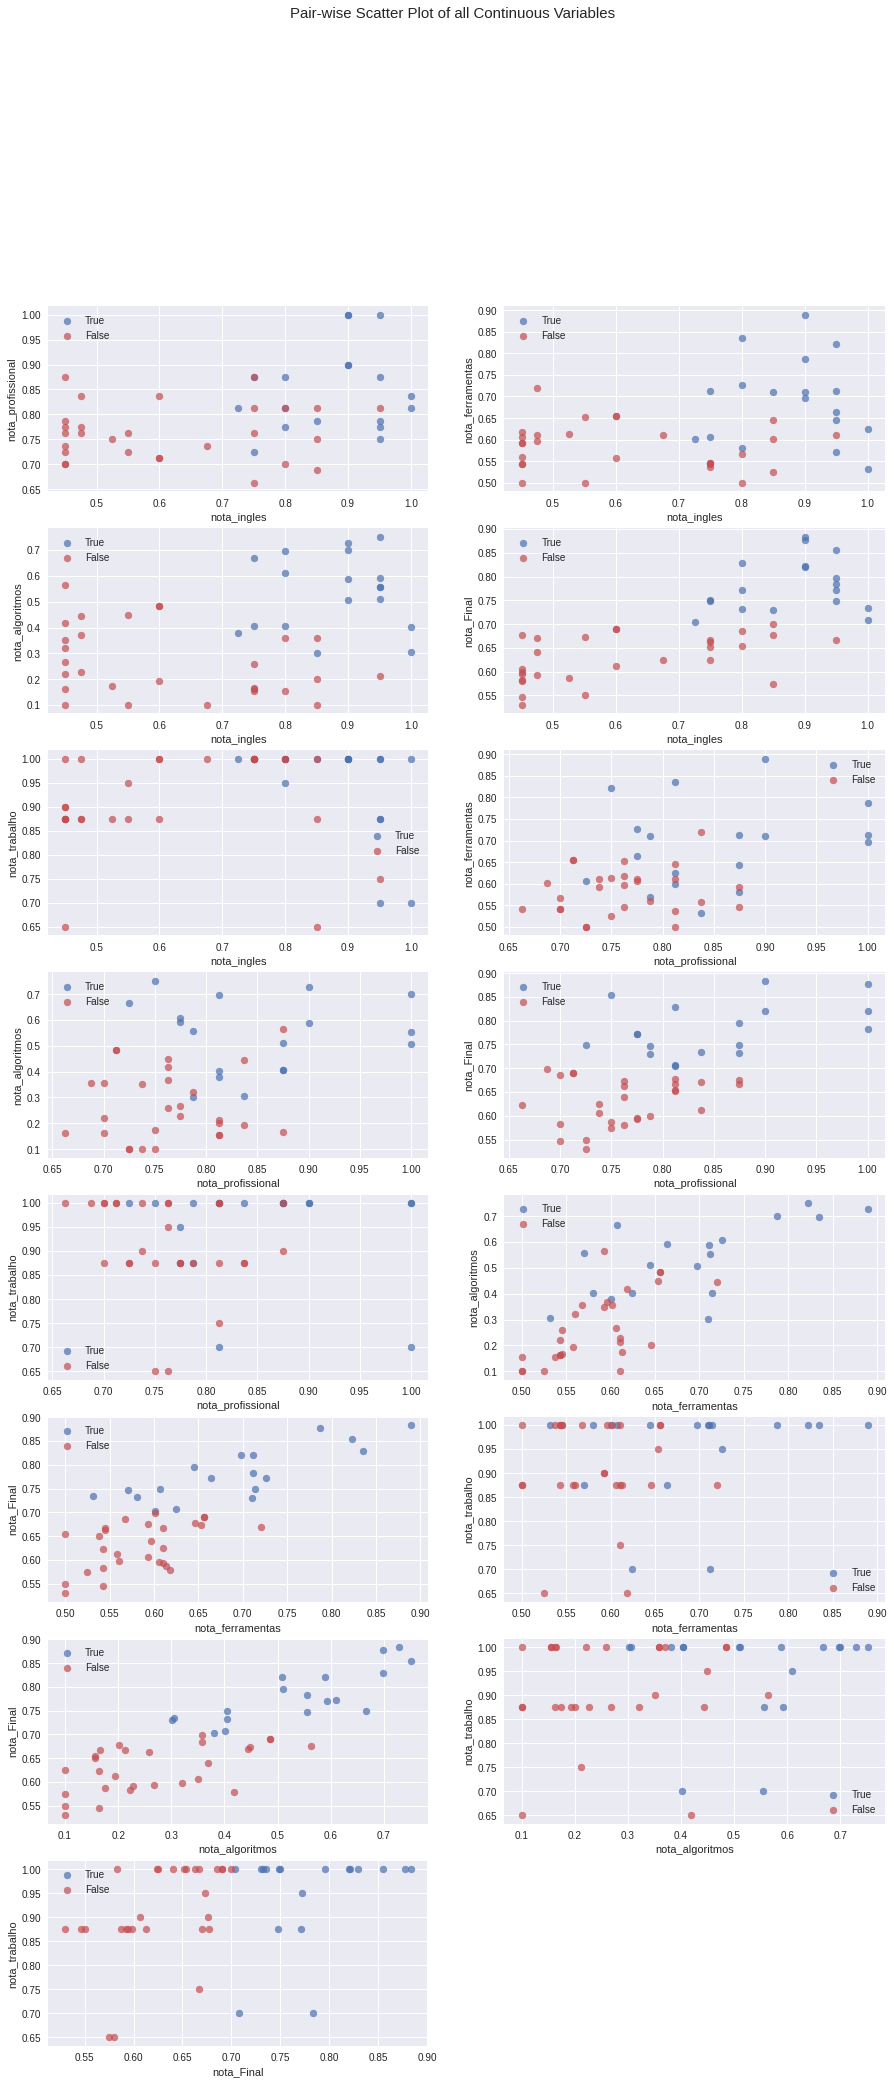

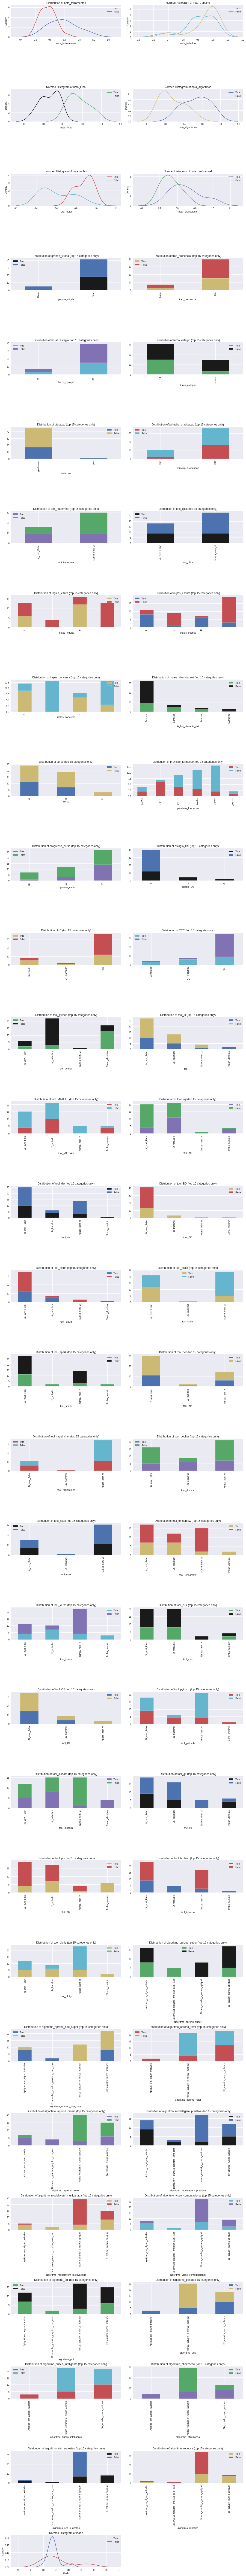

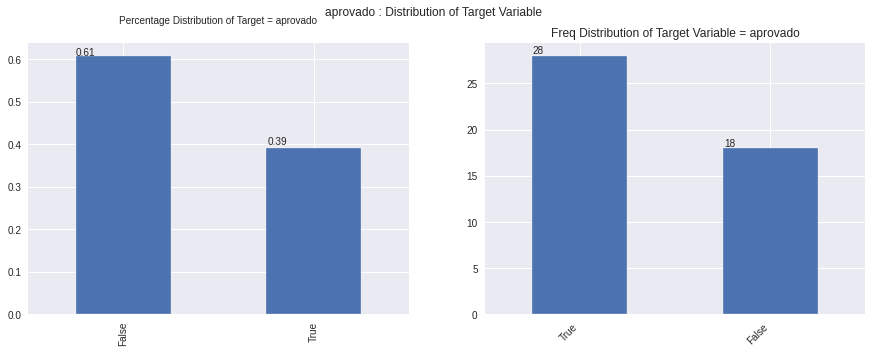

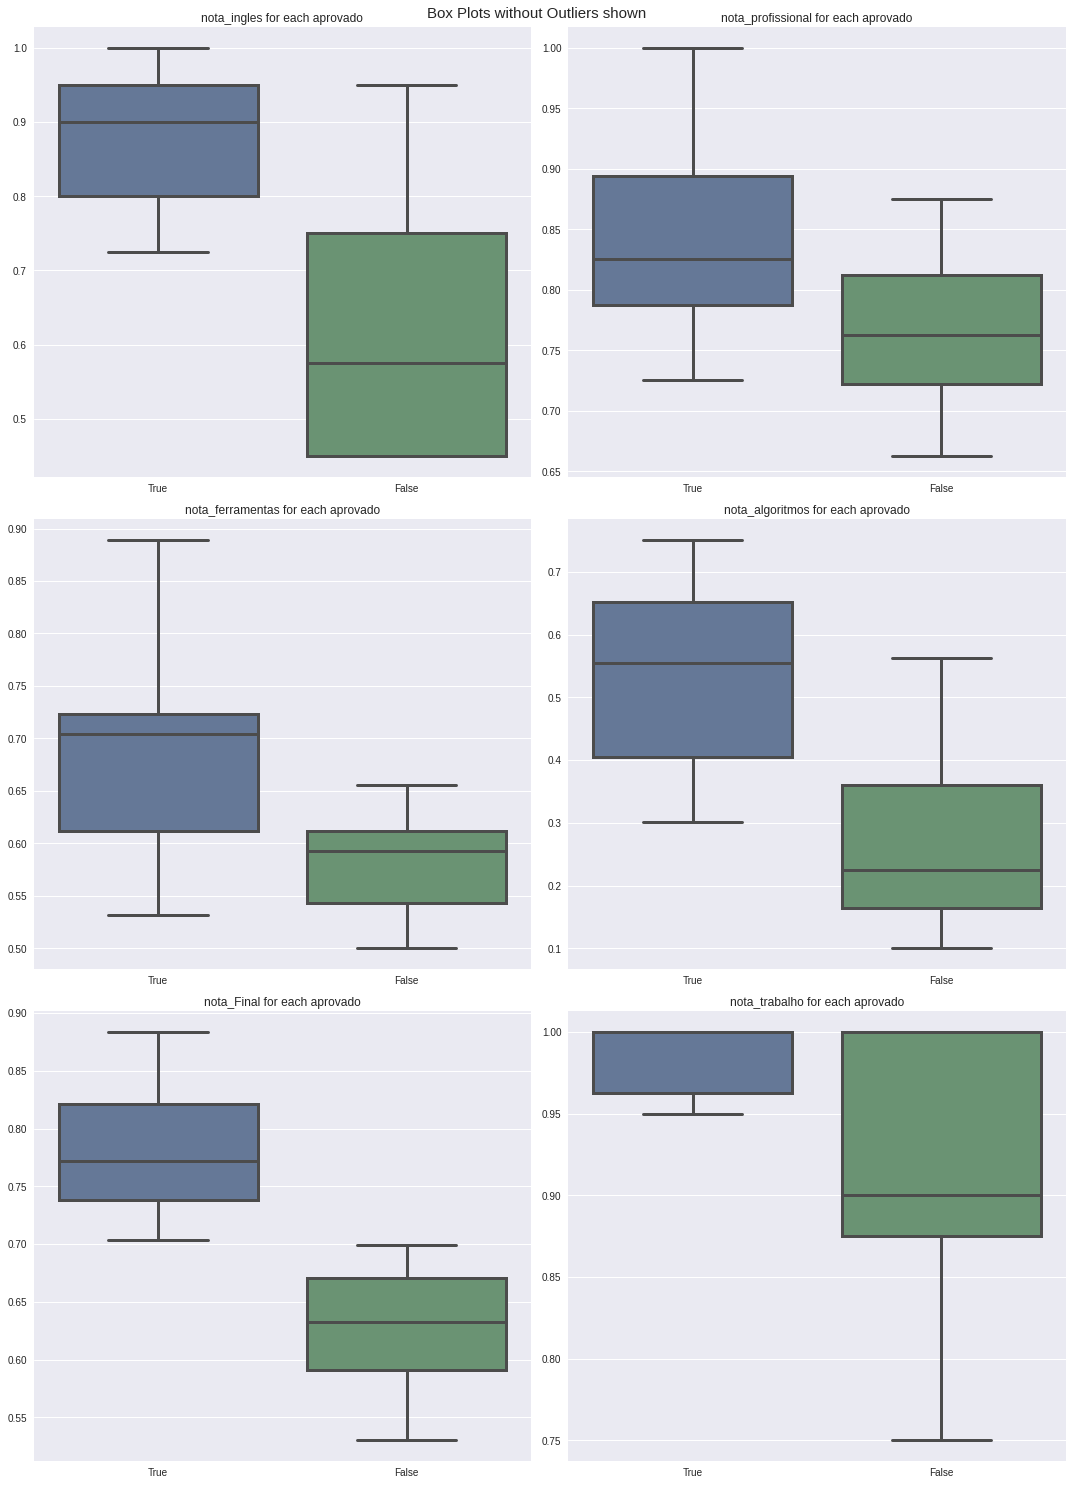

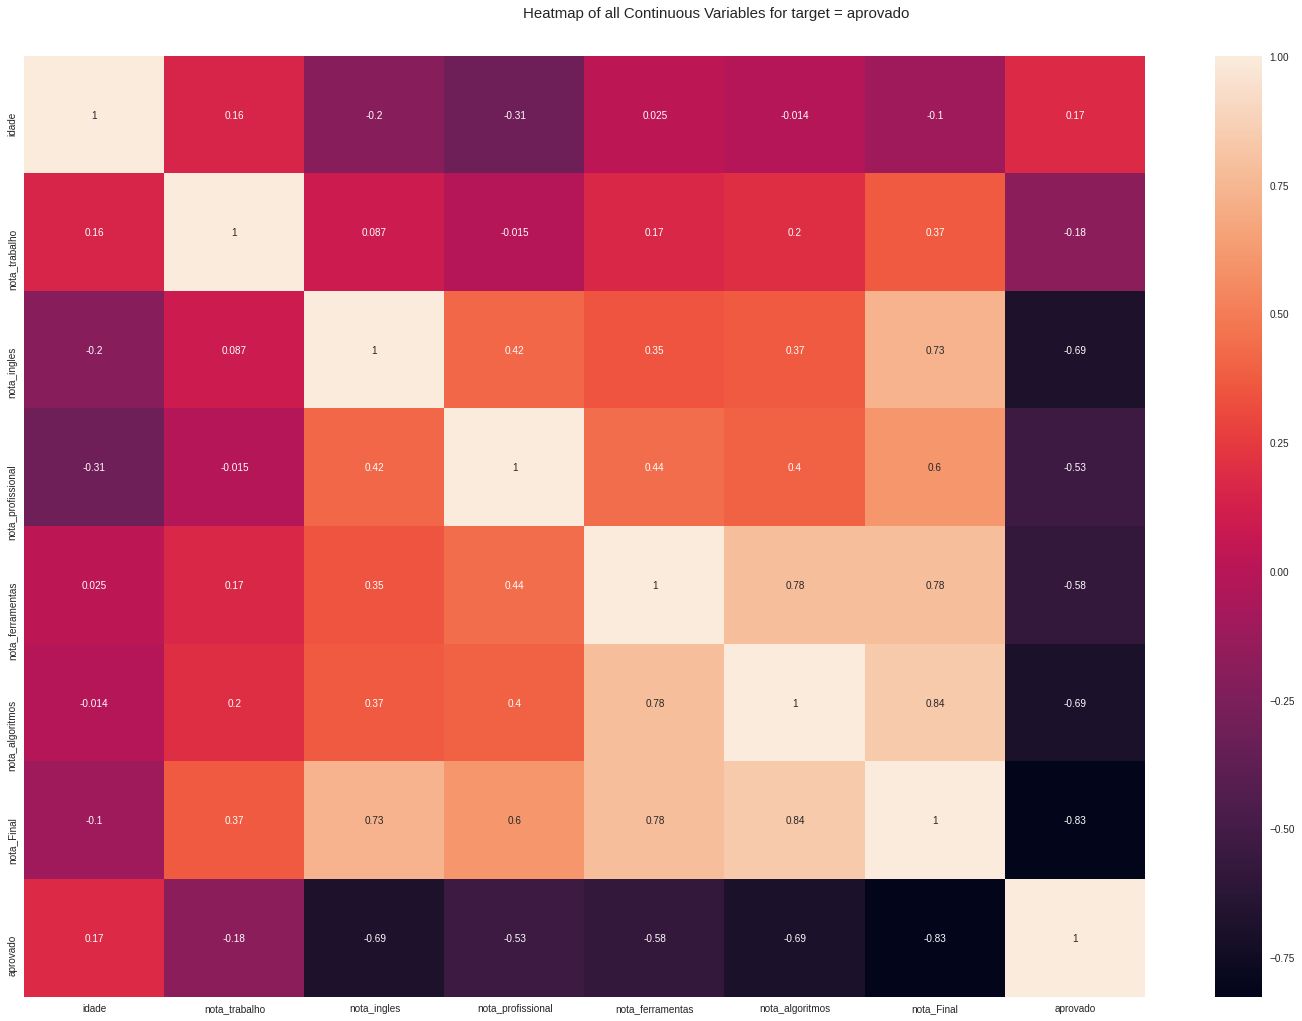

Could not draw Pivot Charts against Dependent Variable


ValueError: Image size of 1440x267660 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x267660 with 1485 Axes>

Time to run AutoViz (in seconds) = 232.955

 ###################### VISUALIZATION Completed ########################


In [9]:
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="aprovado",
    dfte=df_merge_1,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=100,
    max_cols_analyzed=80,
)

In [14]:
columns_aux_nota = df_merge_1.filter(regex='nota').columns

In [15]:
columns_aux_algo = df_merge_1.filter(regex='algo').columns

In [16]:
columns_aux_tool = df_merge_1.filter(regex='tool').columns

## EDA

In [48]:
def corr_heatmap(df):
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(df,cmap="bwr", linewidths=0.5, annot=True,center=False,annot_kws={"size": 11},cbar=True)
    ax.set_title('Correlação - Pearson')
    plt.show()
    return ax

In [49]:
notas = df_merge_1[columns_aux_nota]

In [50]:
notas_no = notas.drop('nota_Final',axis=1)

In [51]:
(notas_no.mean(axis=1) == notas['nota_Final']).value_counts()

True    46
dtype: int64

In [52]:
notas = df_merge_1[columns_aux_nota]
notas['aprovado'] = df_merge_1['aprovado']

In [53]:
var_progresso = pd.DataFrame(df_merge_1.groupby('aprovado').progresso_curso.value_counts()).rename(columns={'progresso_curso':'value'}).reset_index()
var_formacao = pd.DataFrame(df_merge_1.groupby('aprovado').previsao_formacao.value_counts()).rename(columns={'previsao_formacao':'value'}).reset_index()
var_curso = pd.DataFrame(df_merge_1.groupby('aprovado').curso.value_counts()).rename(columns={'curso':'value'}).reset_index()
var_titulo = pd.DataFrame(df_merge_1.groupby('aprovado').titulacao.value_counts()).rename(columns={'titulacao':'value'}).reset_index()
var_ingles_ext = pd.DataFrame(df_merge_1.groupby('aprovado').ingles_vivencia_ext.value_counts()).rename(columns={'ingles_vivencia_ext':'value'}).reset_index()
var_ingles_conversa = pd.DataFrame(df_merge_1.groupby('aprovado').ingles_conversa.value_counts()).rename(columns={'ingles_conversa':'value'}).reset_index()
var_ingles_escrita = pd.DataFrame(df_merge_1.groupby('aprovado').ingles_escrita.value_counts()).rename(columns={'ingles_escrita':'value'}).reset_index()
var_ingles_leitura = pd.DataFrame(df_merge_1.groupby('aprovado').ingles_leitura.value_counts()).rename(columns={'ingles_leitura':'value'}).reset_index()
var_ingles_estagio = pd.DataFrame(df_merge_1.groupby('aprovado').turno_estagio.value_counts()).rename(columns={'turno_estagio':'value'}).reset_index()
var_trab_presencial = pd.DataFrame(df_merge_1.groupby('aprovado').trab_presencial.value_counts()).rename(columns={'trab_presencial':'value'}).reset_index()
var_vitoria = pd.DataFrame(df_merge_1.groupby('aprovado').grande_vitoria.value_counts()).rename(columns={'grande_vitoria':'value'}).reset_index()

In [54]:
corr_nota = pd.DataFrame(df_merge_1.filter(regex='nota'))

In [55]:
corr_resto = pd.concat([pd.DataFrame(df_merge_1[['idade', 'grande_vitoria', 'trab_presencial',
       'horas_estagio', 'turno_estagio', 'ingles_leitura', 'ingles_escrita',
       'ingles_conversa', 'ingles_vivencia_ext', 'titulacao', 'curso',
       'primeira_graduacao', 'previsao_formacao', 'progresso_curso',
       'estagio_DS', 'IC', 'TCC']]),corr_nota], axis=1)

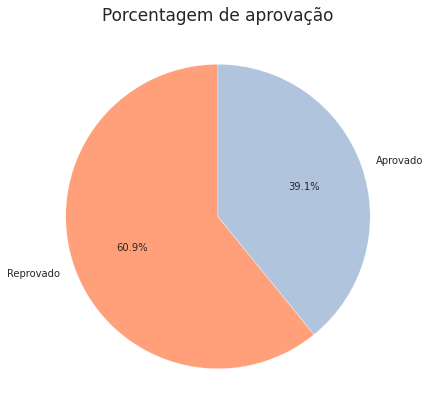

In [56]:
plt.figure(figsize=(7,7))
plt.pie(notas['aprovado'].value_counts(),labels=('Reprovado','Aprovado'), autopct='%1.1f%%',  startangle=90, colors=('lightsalmon','lightsteelblue'))
plt.title('Porcentagem de aprovação', fontsize=17)
plt.show()

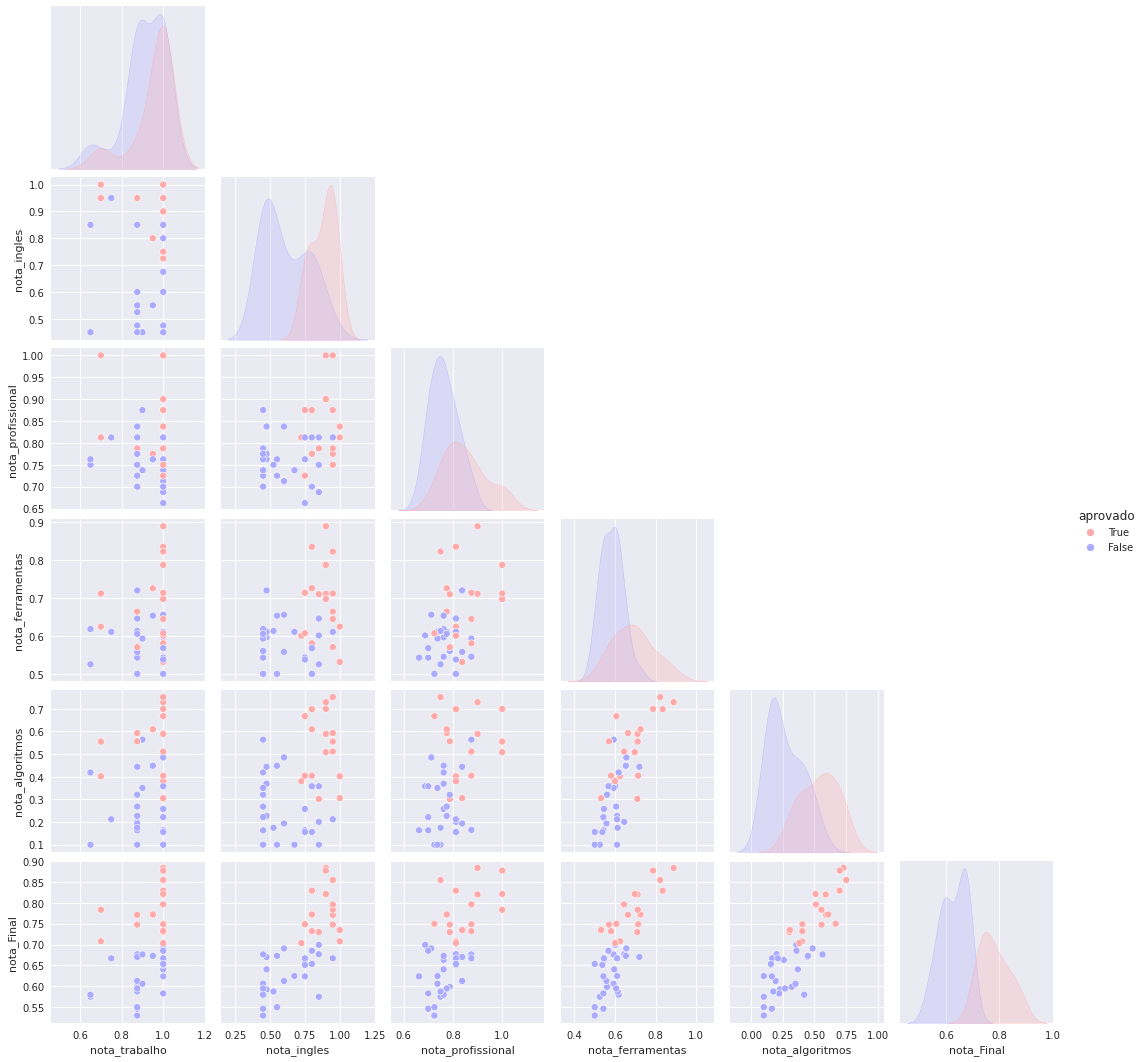

In [57]:
sns.pairplot(notas, diag_kind = 'auto', hue = 'aprovado',corner= 1,palette="bwr_r")
plt.show()

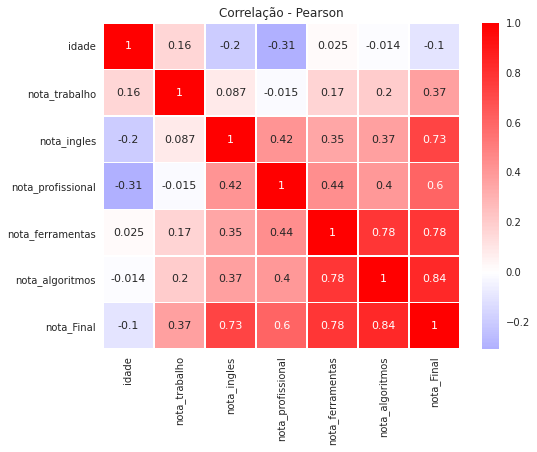

In [58]:
corr_heatmap(df_merge_1.corr());

<Figure size 720x720 with 0 Axes>

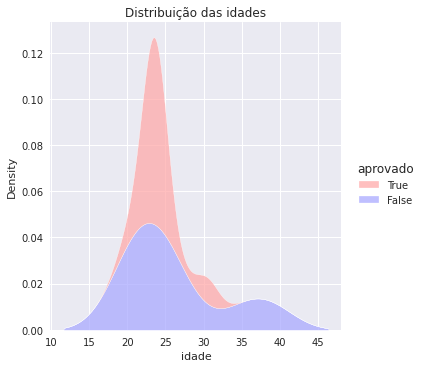

In [59]:
plt.figure(figsize=(10,10))
sns.displot(df_merge_1, x="idade", hue="aprovado", palette="bwr_r",kind="kde", multiple="stack")
plt.title('Distribuição das idades')
plt.show()

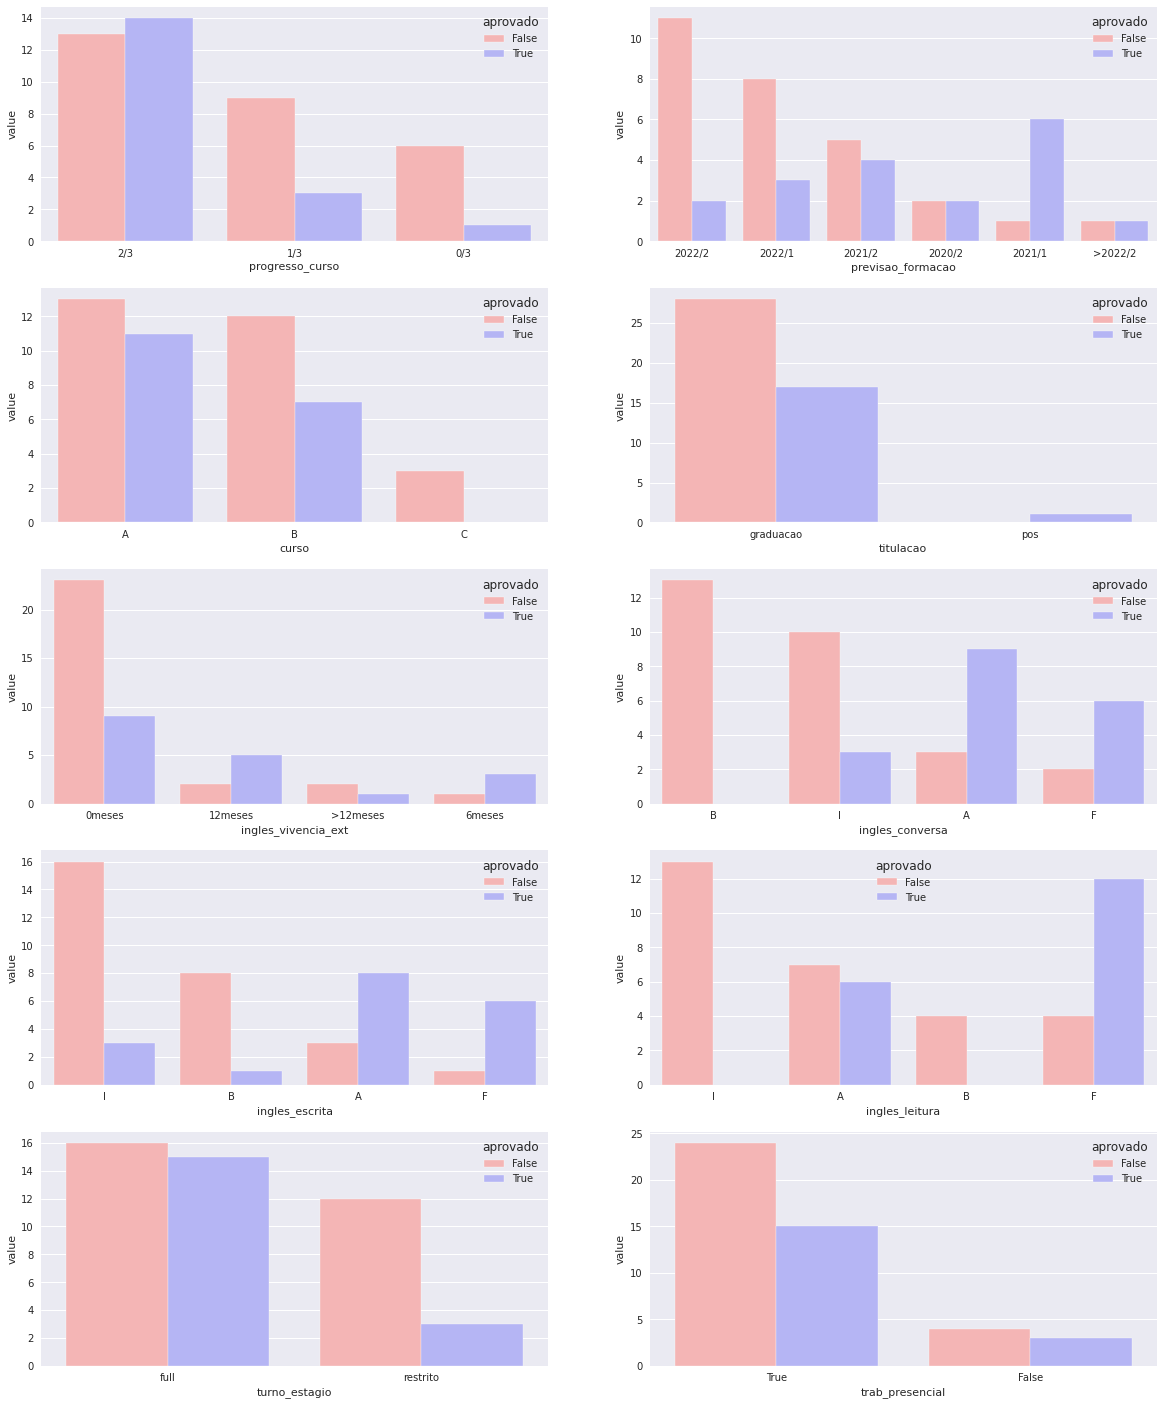

In [60]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(5,2,figsize=(20,25))
sns.barplot(data=var_progresso,x="progresso_curso", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[0][0])
sns.barplot(data=var_formacao,x="previsao_formacao", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[0][1])
sns.barplot(data=var_curso,x="curso", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[1][0])
sns.barplot(data=var_titulo,x="titulacao", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[1][1])
sns.barplot(data=var_ingles_ext,x="ingles_vivencia_ext", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[2][0])
sns.barplot(data=var_ingles_conversa,x="ingles_conversa", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[2][1])
sns.barplot(data=var_ingles_escrita,x="ingles_escrita", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[3][0])
sns.barplot(data=var_ingles_leitura,x="ingles_leitura", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[3][1])
sns.barplot(data=var_ingles_estagio,x="turno_estagio", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[4][0])
sns.barplot(data=var_trab_presencial,x="trab_presencial", y='value', hue='aprovado',ci="sd", palette="bwr_r",ax=axs[4][1])
plt.show()

conclusoes

interval columns not set, guessing: ['idade', 'nota_trabalho', 'nota_ingles', 'nota_profissional', 'nota_ferramentas', 'nota_algoritmos', 'nota_Final']


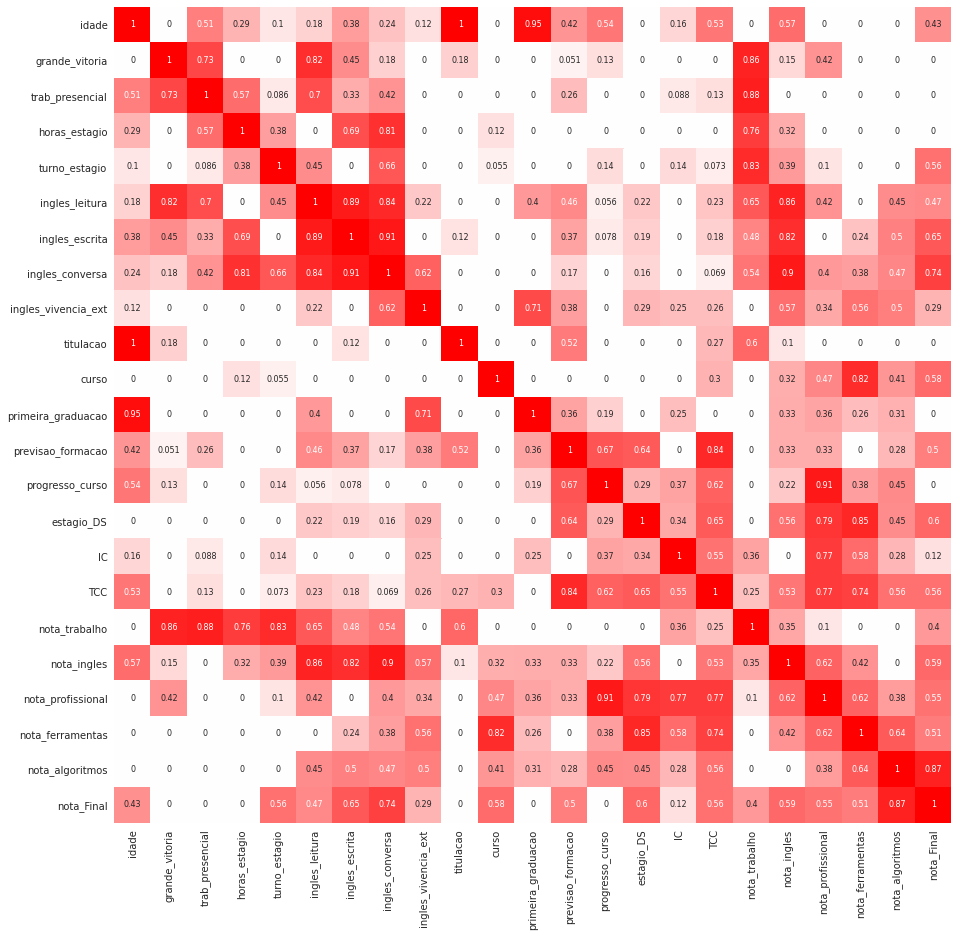

In [61]:
plt.figure(figsize=(15,15))
resto_corr = corr_resto.phik_matrix()
sns.heatmap(resto_corr,cmap='bwr',annot=True,center=False,annot_kws={"size": 8},cbar=False)
plt.show()

interval columns not set, guessing: ['nota_algoritmos']


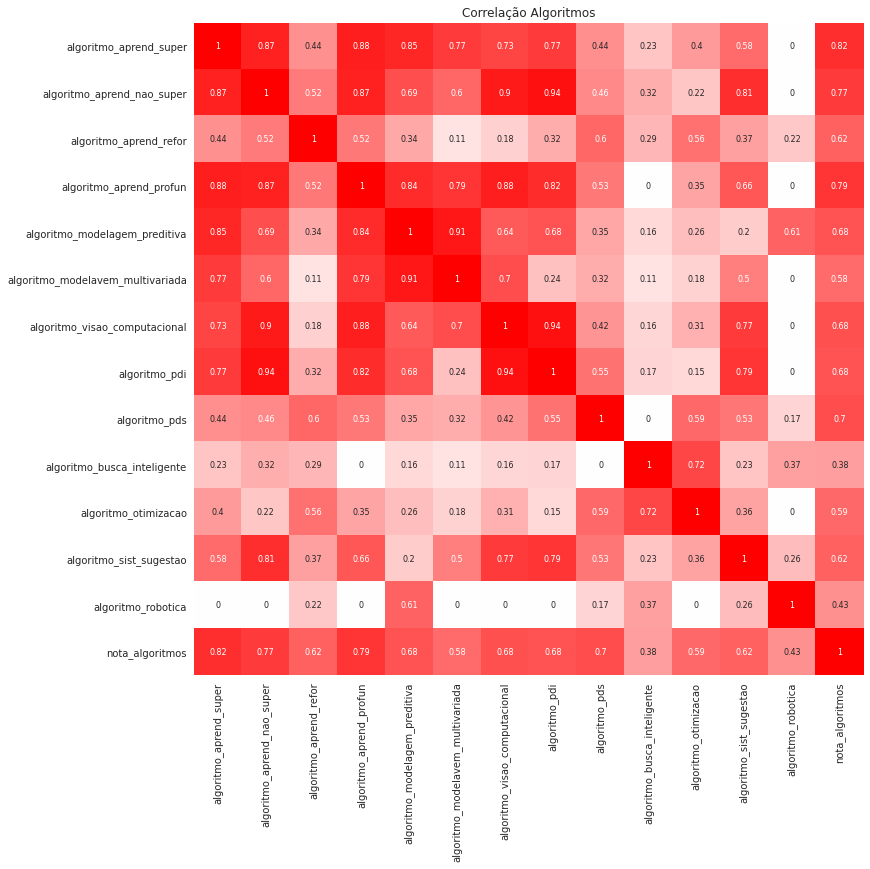

In [62]:
plt.figure(figsize=(12,12))
algo_corr = pd.DataFrame(df_merge_1.filter(regex='algoritmo')).phik_matrix()
sns.heatmap(algo_corr,cmap='bwr',annot=True,center=False,annot_kws={"size": 8},cbar=False)
plt.title('Correlação Algoritmos')
plt.show()

interval columns not set, guessing: ['nota_ferramentas']


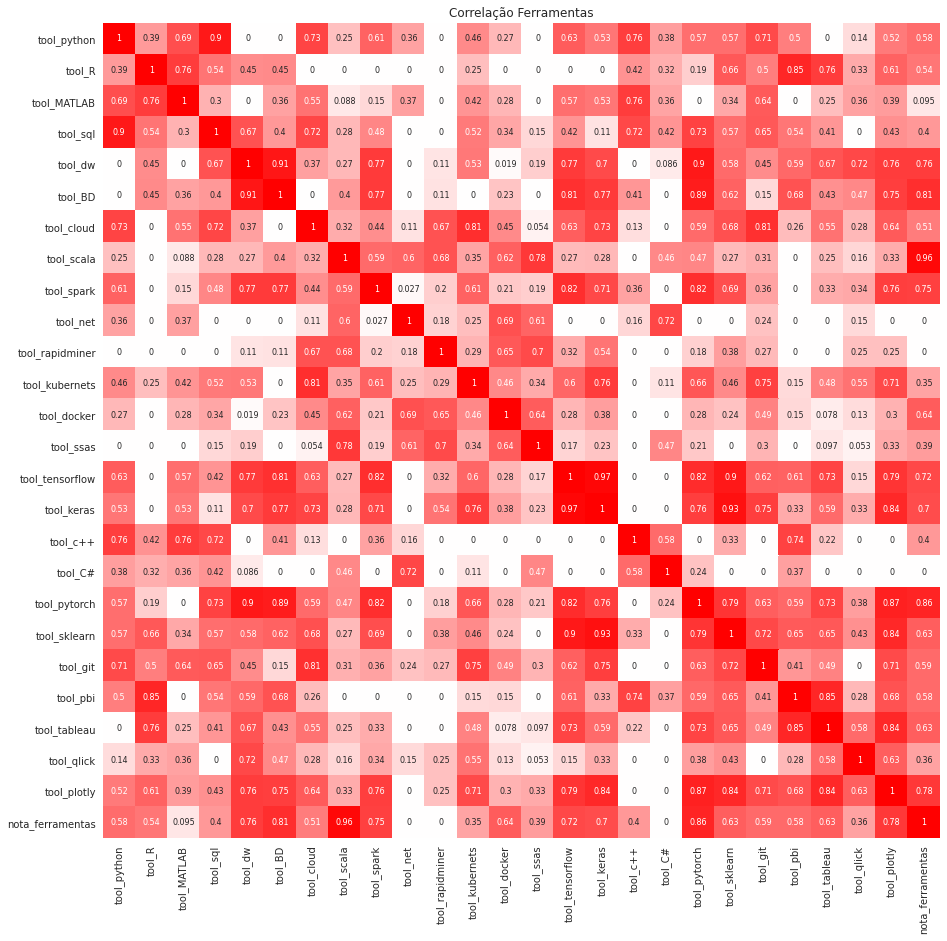

In [63]:
plt.figure(figsize=(15,15))
ferramenta_corr = pd.concat([pd.DataFrame(df_merge_1.filter(regex='tool')),df_merge_1['nota_ferramentas']],axis=1).phik_matrix()
sns.heatmap(ferramenta_corr,cbar=False,cmap='bwr',annot=True,center=False,annot_kws={"size": 8})
plt.title('Correlação Ferramentas')
plt.show()

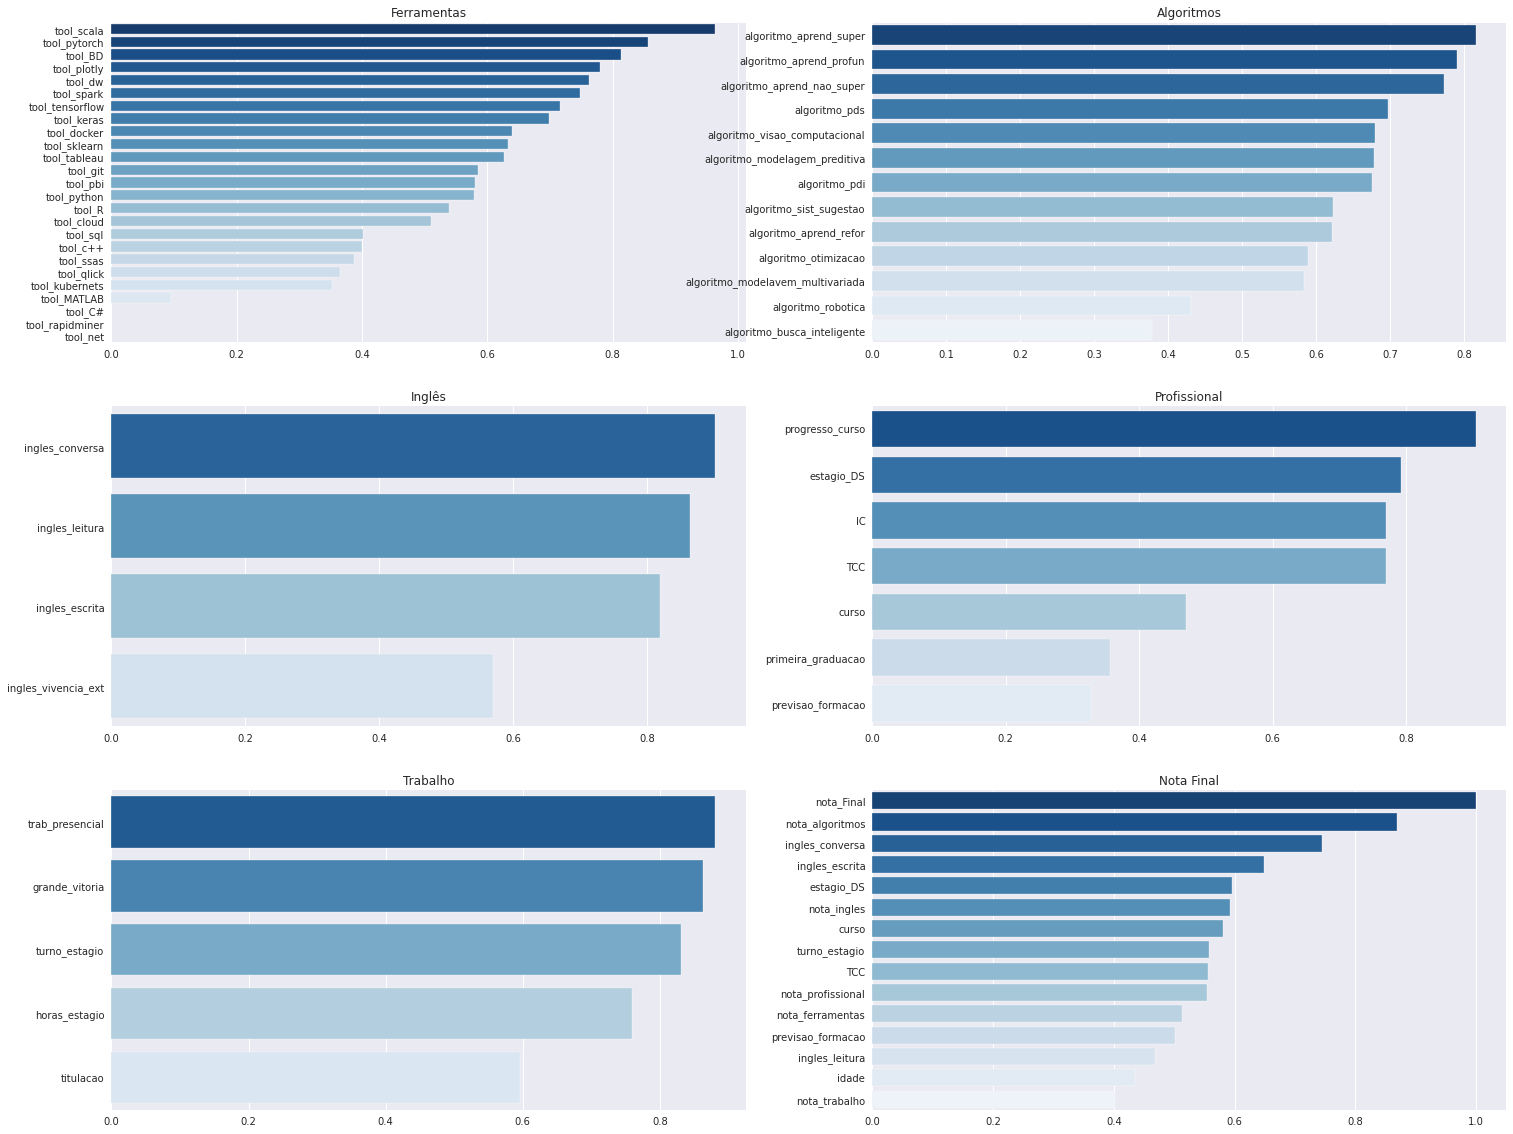

In [64]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(3,2,figsize=(25,20))
sns.barplot(ferramenta_corr.nota_ferramentas.sort_values(ascending=False).values[1:], ferramenta_corr.nota_ferramentas.sort_values(ascending=False).index[1:],palette="Blues_r",orient='h',ax=axs[0][0])
sns.barplot(algo_corr.nota_algoritmos.sort_values(ascending=False).values[1:], algo_corr.nota_algoritmos.sort_values(ascending=False).index[1:],palette="Blues_r",orient='h',ax=axs[0][1])
sns.barplot(resto_corr.nota_ingles.sort_values(ascending=False)[[1,2,3,7]].values, resto_corr.nota_ingles.sort_values(ascending=False)[[1,2,3,7]].index,palette="Blues_r",orient='h',ax=axs[1][0])
sns.barplot(resto_corr.nota_profissional.sort_values(ascending=False)[[1,2,3,4,8,13,15]].values, resto_corr.nota_profissional.sort_values(ascending=False)[[1,2,3,4,8,13,15]].index,palette="Blues_r",orient='h',ax=axs[1][1])
sns.barplot(resto_corr.nota_trabalho.sort_values(ascending=False)[[1,2,3,4,6]].values, resto_corr.nota_trabalho.sort_values(ascending=False)[[1,2,3,4,6]].index,palette="Blues_r",orient='h',ax=axs[2][0])
sns.barplot(resto_corr.nota_Final.sort_values(ascending=False).values[:15], resto_corr.nota_Final.sort_values(ascending=False).index[:15],palette="Blues_r",orient='h',ax=axs[2][1])
axs[0][0].title.set_text('Ferramentas')
axs[0][1].title.set_text('Algoritmos')
axs[1][0].title.set_text('Inglês')
axs[1][1].title.set_text('Profissional')
axs[2][0].title.set_text('Trabalho')
axs[2][1].title.set_text('Nota Final')
plt.show()

**Separando colunas para encoding**

Tudo pode ser codificado direto, mas quero garantir a ordinalidade, então farei isso manualmente, principalmente para a análise dos dados. Existem modelos que não precisam de ordinalidade (decision trees), mas acredito que o problema pode ser todo resolvido com EDA.

In [65]:
def encode_algo(df):
    for column in df:
        df.loc[df[column] == 'Nunca_estudei_e_nunca_apliquei'] = 1
        df.loc[df[column] == 'Só_estudei_nunca_apliquei'] = 2
        df.loc[df[column] == 'Apliquei_em_algum_trabalho'] = 3
        df.loc[df[column] == 'Desenvolvi_grandes_projetos_com_isso'] = 4
    return df

In [66]:
def encode_tool(df):
    for column in df:
        df.loc[df[column] == 'Nunca_nem_vi'] = 0
        df.loc[df[column] == 'Só_estudei_nunca_apliquei'] = 1
        df.loc[df[column] == 'Já_trabalhei'] = 2
        df.loc[df[column] == 'Tenho_domínio'] = 3
    return df

In [67]:
def encode_tcc_ic(df):
    for column in df:
        df.loc[df[column] == 'Não'] = 0
        df.loc[df[column] == 'Fazendo'] = 1
        df.loc[df[column] == 'Concluido'] = 2
    return df

In [68]:
def encode_estagio(df):
    for column in df:
        df.loc[df[column] == '0'] = 0
        df.loc[df[column] == '1'] = 1
        df.loc[df[column] == '>1'] = 2
    return df

In [69]:
def encode_curso(df):
    for column in df:
        df.loc[df[column] == '0/3'] = 0
        df.loc[df[column] == '1/3'] = 1
        df.loc[df[column] == '2/3'] = 2
    return df

In [70]:
def encode_vivencia(df):
    for column in df:
        df.loc[df[column] == '0meses'] = 0
        df.loc[df[column] == '6meses'] = 1
        df.loc[df[column] == '12meses'] = 2
        df.loc[df[column] == '>12meses'] = 3
    return df

In [71]:
def encode_ingles(df):
    for column in df:
        df.loc[df[column] == 'B'] = 0
        df.loc[df[column] == 'I'] = 1
        df.loc[df[column] == 'A'] = 2
        df.loc[df[column] == 'F'] = 3
    return df

In [72]:
df_cand_enco = encode_algo(pd.DataFrame(df_cand.filter(regex='algoritmo')))
df_cand_enco[df_cand.filter(regex='tool').columns] = encode_tool(pd.DataFrame(df_cand.filter(regex='tool')))
df_cand_enco[['IC','TCC']] = encode_tcc_ic(pd.DataFrame(df_cand[['IC','TCC']]))
df_cand_enco['estagio_DS'] = encode_estagio(pd.DataFrame(df_cand['estagio_DS']))
df_cand_enco['progresso_curso'] = encode_curso(pd.DataFrame(df_cand['progresso_curso']))
df_cand_enco['previsao_formacao'] = df_cand['previsao_formacao'].factorize()[0].astype('object')
df_cand_enco['curso'] = df_cand['curso'].factorize()[0].astype('object')
df_cand_enco['titulacao'] = df_cand['titulacao'].factorize()[0].astype('object')
df_cand_enco['ingles_vivencia_ext'] = encode_vivencia(pd.DataFrame(df_cand['ingles_vivencia_ext']))
df_cand_enco[['ingles_leitura', 'ingles_escrita', 'ingles_conversa']] = encode_ingles(pd.DataFrame(df_cand.filter(regex='ingles')).drop('ingles_vivencia_ext',axis=1))
df_cand_enco['turno_estagio'] = df_cand['turno_estagio'].factorize()[0].astype('object')
df_cand_enco['horas_estagio'] = df_cand['horas_estagio'].factorize()[0].astype('object')
df_cand_enco[['grande_vitoria','trab_presencial','primeira_graduacao','idade','nome']] = df_cand[['grande_vitoria','trab_presencial','primeira_graduacao','idade','nome']]
df_cand_enco['idade'] = df_cand_enco['idade'].astype('int64')

In [73]:
df_cand_enco.to_csv('data/preprocess2.csv', index = False, header=True)